Define a function named get_lower_and_upper_bounds that has two arguments. 
- The first argument is a pandas Series. 
- The second argument is the multiplier, which should have a default argument of 1.5.

In [43]:
def get_lower_and_upper_bounds(df, col_list, multiplier = 1.5):
    '''
    s should be pandas series
    '''
    low_up = pd.DataFrame(columns = ['col_name', 'lower_bound', 'upper_bound'])
    for c in col_list:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.75)
        IQR = Q3 - Q1
        lb = Q1 - IQR * multiplier
        ub = Q3 + IQR * multiplier
        low_up = pd.concat([pd.DataFrame
                           ([c, lb, ub]
                           ,columns = ['col_name', 'lower_bound', 'upper_bound'])
                           ])
        
    
    return low_up

In [44]:
low_up = get_lower_and_upper_bounds(df, df.select_dtypes(include = ['int', 'float']).columns.to_list(), multiplier = 1.5)
low_up

ValueError: Shape of passed values is (3, 1), indices imply (3, 3)

In [ ]:
pd.concat([pd.DataFrame(
    [[model_type, i, 'mse', evaluate(target_var = i, train = train, test = test, output=False) [0]],
     [model_type, i, 'rmse', evaluate(target_var = i, train = train, test = test, output=False)[1]]
    ],
     columns=['model_type', 'target_var', 'metric', 'value']) 
                              for i in target_vars], ignore_index=True)

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('lemonade.csv')

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.589041,29.979680,7.0,20.00,25.00,30.00,534.0


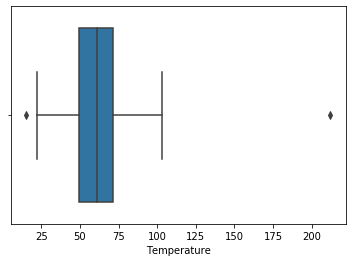

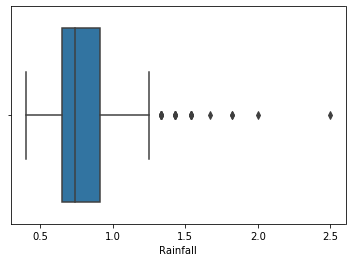

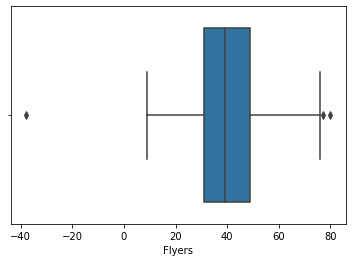

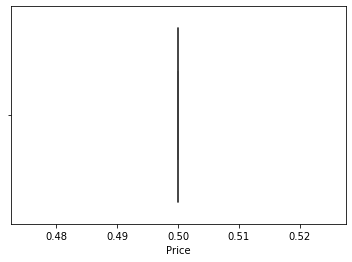

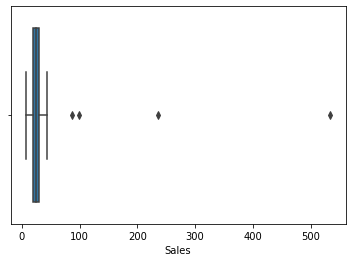

In [30]:
for col in df.select_dtypes(include = ['int', 'float']).columns.to_list():
    sns.boxplot(df[col])
    plt.show()

In [33]:
lb, ub = get_lower_and_upper_bounds(df.Sales, multiplier = 1.5)

In [34]:
lb

5.0

In [35]:
ub

45.0

In [37]:
df.Sales.quantile(.25)

20.0

In [38]:
df.Sales.quantile(.75)

30.0

In [ ]:
IQR = 10
ub = 20 - 10*1.5

In [41]:
30 + 10*1.5

45.0